In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
df = pd.read_csv("../../data/test.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67


In [3]:
df= df.drop(["id","x","y","z"], axis=1)

In [4]:
columnas_numeric = df.select_dtypes(include = np.number)
columnas_numeric

,carat,depth,table
0,0.32,60.5,58.0
1,1.24,62.9,60.0
2,1.66,62.0,59.0
3,0.75,60.6,56.0
4,1.50,64.8,55.0
...,...,...,...
13480,1.10,59.6,60.0
13481,0.90,62.1,60.0
13482,0.30,62.1,53.3
13483,1.25,59.6,59.0


### Outliers 

In [5]:
def detectar_outliers_Q1(lista_columnas, dataframe): 
    
    dicc_indices_Q1 = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data_Q1 = dataframe[(dataframe[col] < Q1 - outlier_step)]
        
        
        if outliers_data_Q1.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices_Q1[col] = (list(outliers_data_Q1.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices_Q1

In [6]:
def detectar_outliers_Q3(lista_columnas, dataframe): 
    
    dicc_indices_Q3 = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data_Q3 = dataframe[(dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data_Q3.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices_Q3[col] = (list(outliers_data_Q3.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices_Q3

In [7]:
lista_numericas= columnas_numeric.columns
lista_numericas

Index(['carat', 'depth', 'table'], dtype='object')

In [8]:
q1= detectar_outliers_Q1(lista_numericas, df)

In [9]:
q3= detectar_outliers_Q3(lista_numericas, df)

In [10]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in q1.items():
    Q1 = np.nanpercentile(df[k], 25) # calculamos el Q1 para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = Q1 

In [11]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in q3.items():
    Q3 = np.nanpercentile(df[k], 75) # calculamos el Q3 para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = Q3 

In [14]:
num= df.select_dtypes(include = np.number)
num.head()

,carat,depth,table
0,0.32,60.5,58.0
1,1.24,62.9,60.0
2,1.66,62.0,59.0
3,0.75,60.6,56.0
4,1.50,62.5,55.0


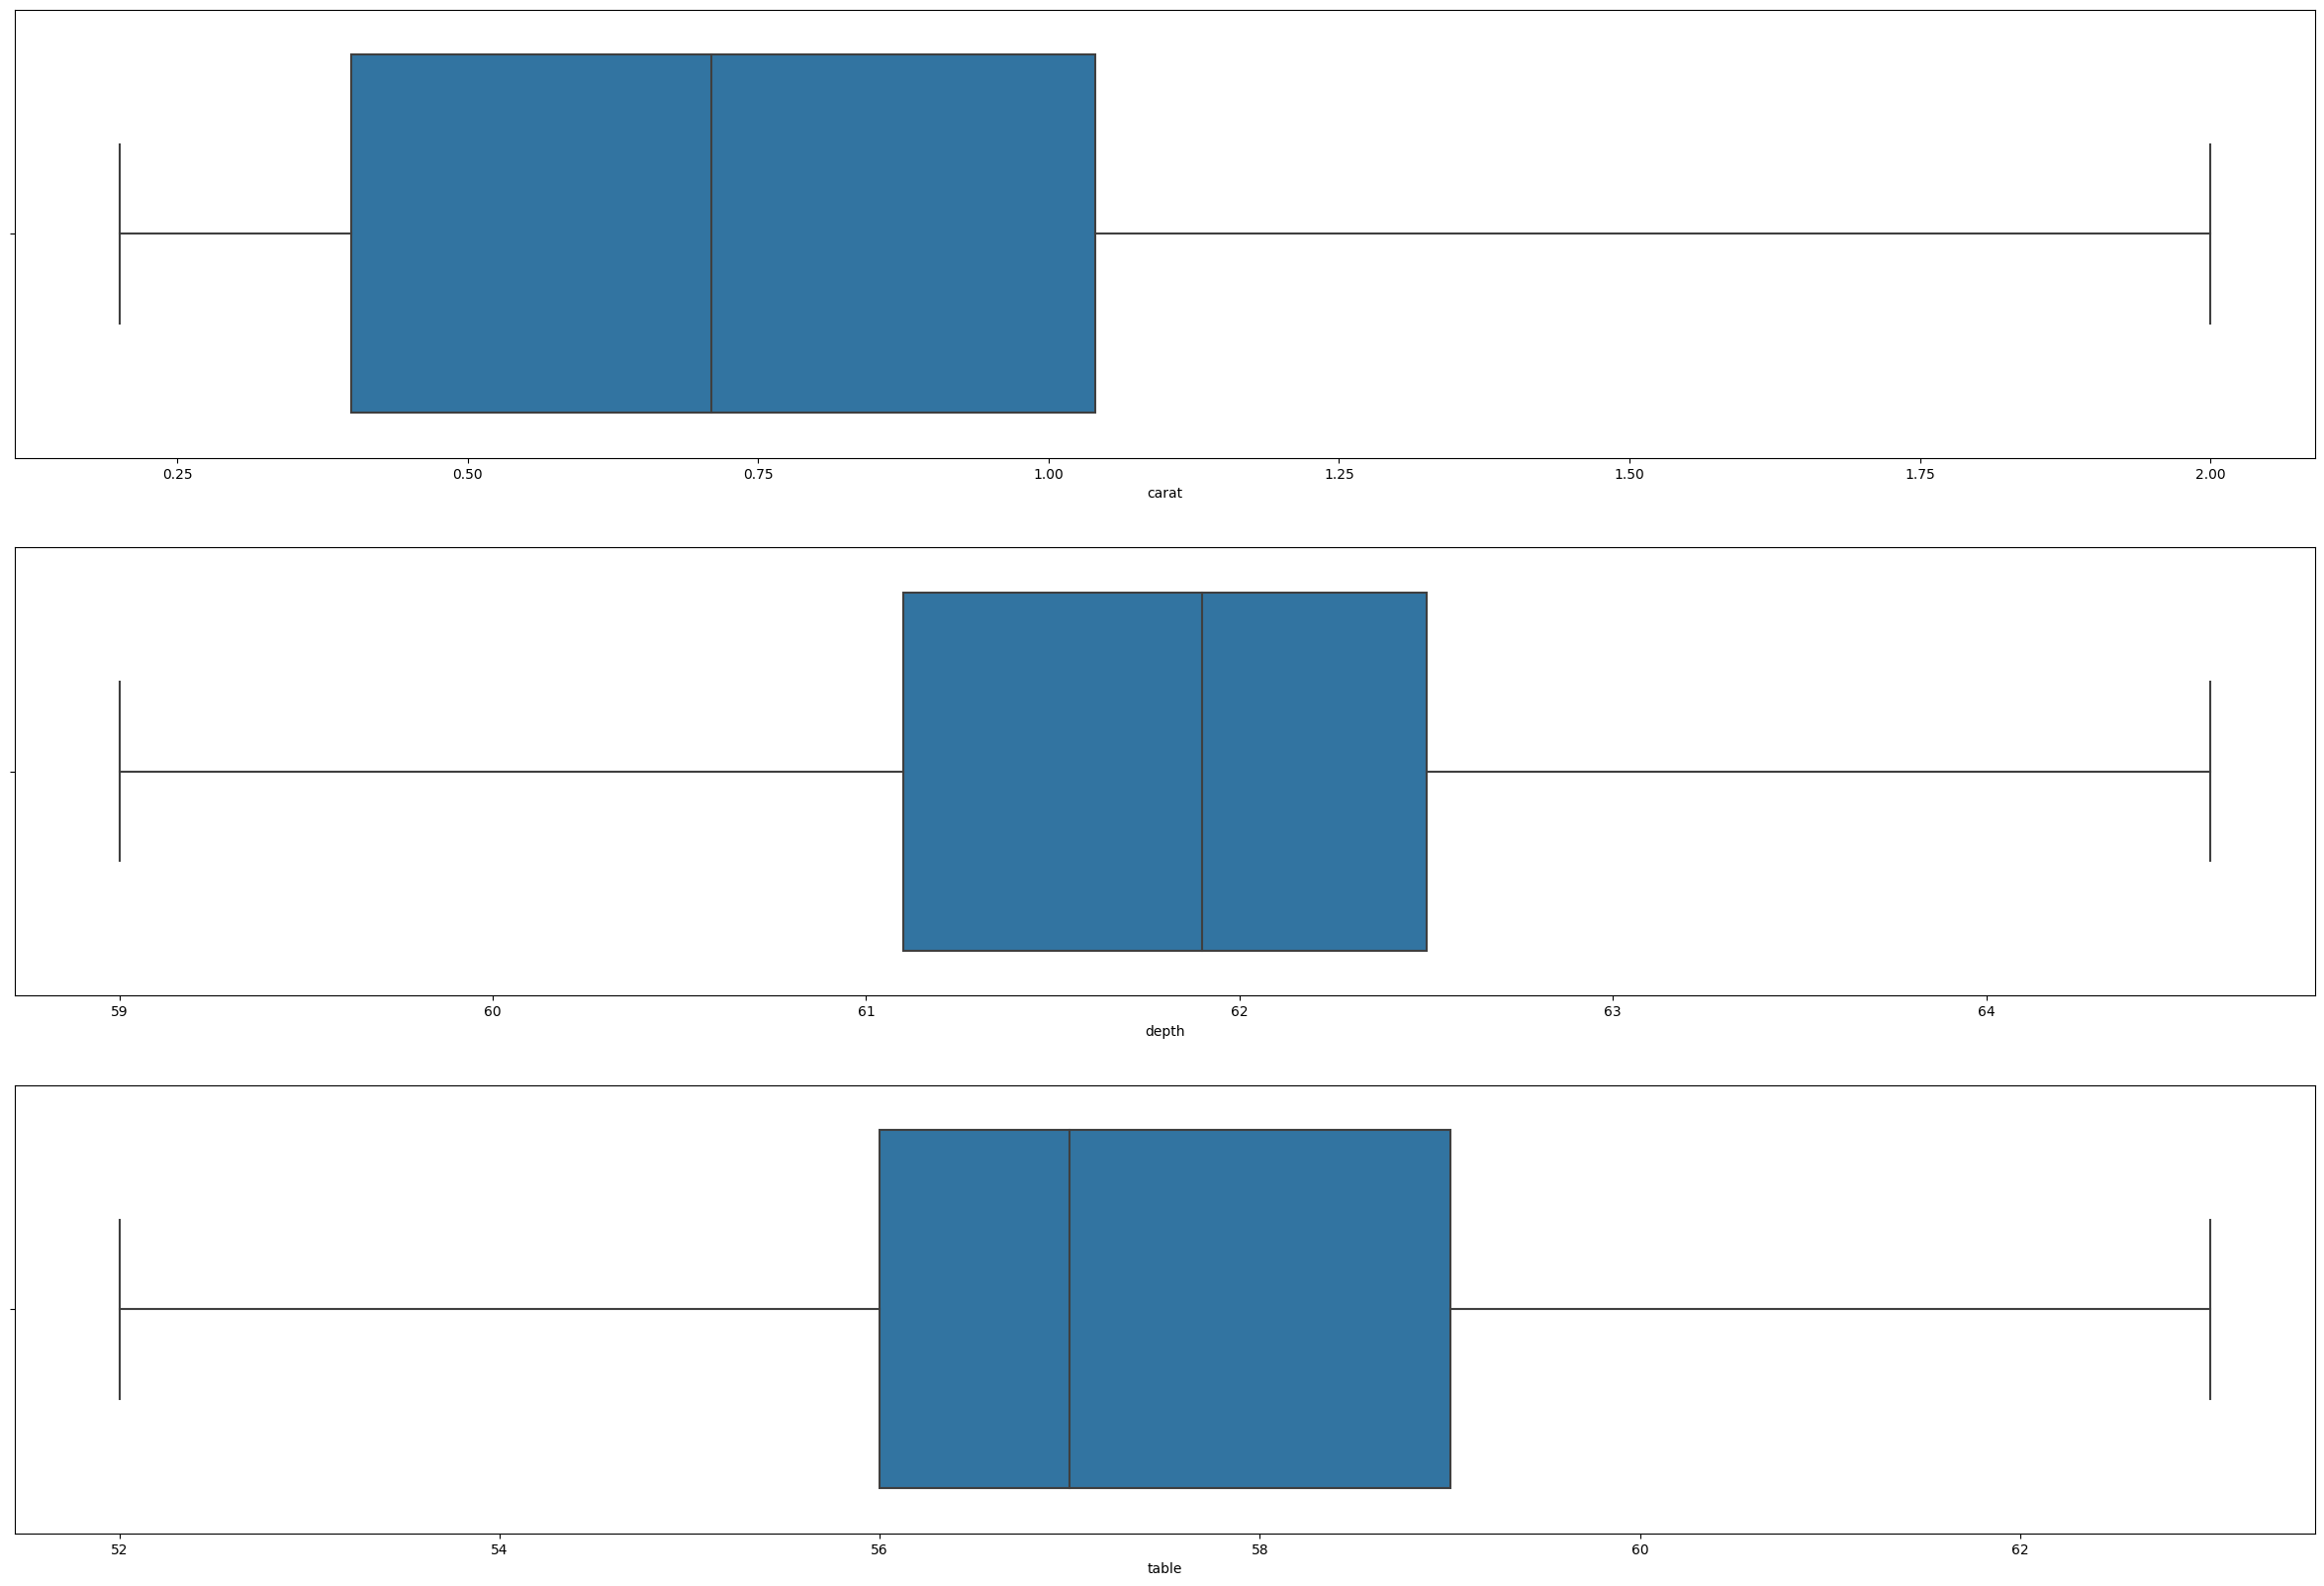

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(30,20))

for i in range(len(num.columns)):
    sns.boxplot(x=num.columns[i], data=num, ax=ax[i])
plt.show()

### Transformación

In [22]:
# encoding 

with open('data/encodingclarity.pkl', 'rb') as clarity:
    clarity = pickle.load(clarity)  

with open('data/encodingcolor.pkl', 'rb') as color:
    color = pickle.load(color) 

with open('data/encodingcut.pkl', 'rb') as cut:
    cut = pickle.load(cut) 

# Estandarización

with open('data/estandarizacion1.pkl', 'rb') as stand:
    stand = pickle.load(stand)  

# cargamos el mejor modelo

with open('data/modelo1.pkl', 'rb') as modelo1:
    modelo1= pickle.load(modelo1)
    
with open('data/modelo2.pkl', 'rb') as modelo2:
    modelo2= pickle.load(modelo2)

with open('data/mejor_modelo2.pkl', 'rb') as best_modelo:
    best_modelo = pickle.load(best_modelo)

In [19]:
#  hacemos el encoding del resto de las variables

clar= pd.DataFrame(clarity.transform(df[['clarity']]), columns= ['clarity'])
col= pd.DataFrame(color.transform(df[['color']]), columns= ['color'])
cut= pd.DataFrame(cut.transform(df[['cut']]), columns= ['cut'])
est= pd.DataFrame(stand.transform(df[['carat', 'depth', 'table']]), columns= ['carat', 'depth', 'table'])

In [20]:
# unimos todos los conjuntos de datos que hemos ido generando con los transformers

df1= pd.concat([clar, col, cut, est], axis = 1)
df1.head(1)

,clarity,color,cut,carat,depth,table
0,2,1,3,-1.097653,-1.147121,0.296983


In [21]:
# cambiamos el orden de las columnas ya que estas deben estar en el mismo orden de como entrenamos al modelo

df1 = df1.reindex(['carat', 'cut', 'color', 'clarity', 'depth', 'table'], axis=1)
df1.head(1)

,carat,cut,color,clarity,depth,table
0,-1.097653,3,1,2,-1.147121,0.296983


In [25]:
# hacemos la predicción 

df["price"] = modelo1.predict(df1)

In [26]:
submission = pd.DataFrame(df["price"]).reset_index()
submission=submission.rename(columns={'index': 'id'})
submission.to_csv("data/submission_03.csv", index=False)

In [27]:
# hacemos la predicción 

df["price"] = modelo2.predict(df1)

In [28]:
submission = pd.DataFrame(df["price"]).reset_index()
submission=submission.rename(columns={'index': 'id'})
submission.to_csv("data/submission_04.csv", index=False)

In [29]:
# hacemos la predicción 

df["price"] = best_modelo.predict(df1)

In [30]:
submission = pd.DataFrame(df["price"]).reset_index()
submission=submission.rename(columns={'index': 'id'})
submission.to_csv("data/submission_05.csv", index=False)